Title: Predict presence of heart disease

Introduction: 

Heart disease includes various conditions affecting heart function and structure, influenced by factors such as age, resting blood pressure, and serum cholesterol levels. This project aims to predict the presence of heart disease using age and resting blood pressure data. We will utilize a dataset from the UCI Machine Learning Repository, containing heart disease data from Switzerland. This dataset contains 14 kinds of data related to heart disease of different people.  

In [38]:
set.seed(100)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [114]:
switzerland_data <- read_csv("data/heart_disease/processed.switzerland.data", col_names = FALSE)
colnames(switzerland_data) <- c("age", "sex", "cp", "trestbps","chol","fbs","restecg","thalach","exang","oldpeak", "slope", "ca", "thal", "num")
processed_data <- switzerland_data |>
mutate(num = ifelse(num == 0, "No", "Yes")) |>
mutate(num = as.factor(num)) |>
mutate(trestbps = as.numeric(trestbps)) |>
select(age, trestbps, num)

processed_data

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `trestbps = as.numeric(trestbps)`.
Caused by warning:
! NAs introduced by coercion”


age,trestbps,num
<dbl>,<dbl>,<fct>
32,95,Yes
34,115,Yes
35,NA,Yes
⋮,⋮,⋮
72,160,No
73,160,Yes
74,145,Yes


In [115]:
switzerland_split <- initial_split(processed_data, prop = 0.75, strata = num)
switzerland_train <- training(switzerland_split)
switzerland_test <- testing(switzerland_split)

switzerland_train
switzerland_test

age,trestbps,num
<dbl>,<dbl>,<fct>
32,95,Yes
34,115,Yes
36,110,Yes
⋮,⋮,⋮
70,140,Yes
73,160,Yes
74,145,Yes


age,trestbps,num
<dbl>,<dbl>,<fct>
35,NA,Yes
38,105,Yes
38,110,Yes
⋮,⋮,⋮
68,135,Yes
69,135,Yes
72,160,No


In [116]:
summary_table <- switzerland_train |>
  group_by(num) |>
  summarise(
    count = n(),
    mean_age = mean(age, na.rm = TRUE),
    mean_trestbps = mean(trestbps, na.rm = TRUE),
    missing_age = sum(is.na(age)),
    missing_trestbps = sum(is.na(trestbps))
  )

summary_table

num,count,mean_age,mean_trestbps,missing_age,missing_trestbps
<fct>,<int>,<dbl>,<dbl>,<int>,<int>
No,3,58.00000,135.0000,0,0
Yes,89,55.47191,130.5114,0,1


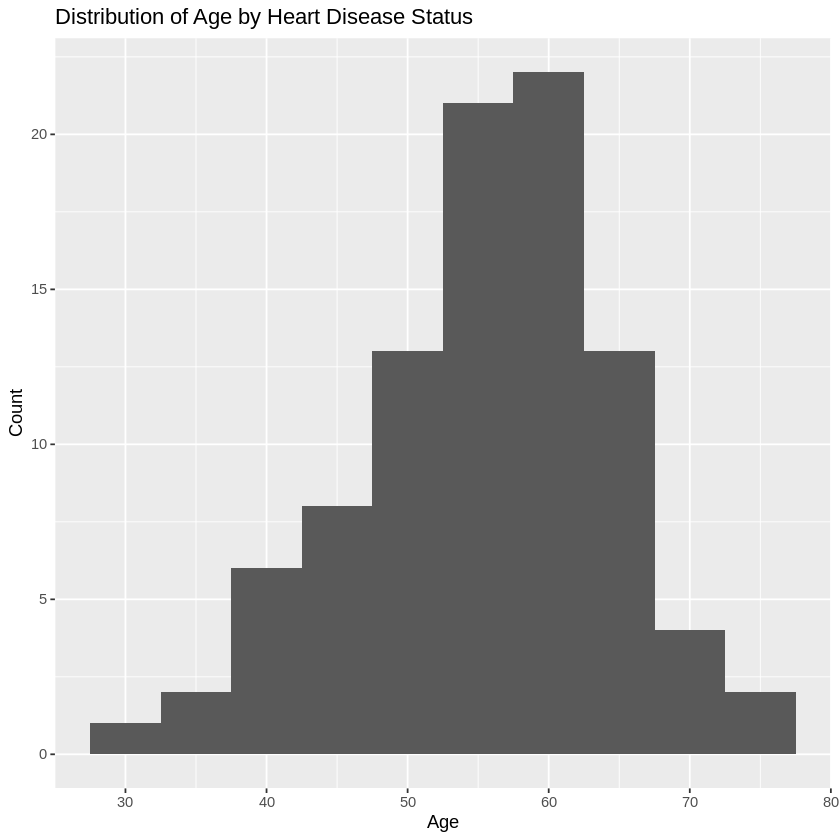

In [118]:
ggplot(switzerland_train, aes(x = age)) +
  geom_histogram(binwidth = 5, position = "dodge") +
  labs(title = "Distribution of Age by Heart Disease Status", x = "Age", y = "Count") 

Method: 

I will use three columns of data to conduct this project, num, age and trestbps(resting blood pressure). I would split the data into with heart disease and wihtout heart disesase by using num. Originally, num consists of 5 kinds of data which is "0", "1", "2", "3" and "4". In this project, "0" would be without heart disesase and other integers would be with heart disease. Then I would build a knn model by using age and trestbps and train them by the trainning dataset. The model would be able to predict if new data is with or without heart disease by age and trestbps. I would also visualize the relationship between num, age and trestbps by using scatterplot and num would be the class for colour and other variables would be x and y.

Expected outcomes and significance:

We expect to find a significant correlation between age, trestbps (resting blood pressure), and the presence of heart disease. The knn model should be able to predict whether an individual has heart disease based on these two predictors. Such findings could have a substantial impact on the early detection and prevention of heart disease. By identifying individuals at risk based on simple, non-invasive measures like age and resting blood pressure. This can lead to better health outcomes and potentially reduce the incidence of severe heart-related events. One potential question that this project will leads to would be if other factors could predict the presence of heart disease as well or if addition of other factors into this model would increase the accuracy of this model